<h1 style="color:Purple"> Name : Dhaintry Tanusha</h1>

<h1 style="color:Purple"> The Sparks Foundation : Graduate Rotational Internship Program</h1>

<h1 style="color:Orange"> Exploratory Data Analysis - Retail</h1>

____________

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

● You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS)

● Dataset: https://bit.ly/3i4rbWl

___________

<h2 style="color:Brown"> Importing Basic Libraries and Dataset</h2>

______________________

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
retail = pd.read_csv('SampleSuperstore.csv')
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


<h2 style="color:Brown"> General Information about the data</h2>

In [3]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
## Dimension of data
print(" Shape of retail data is {}".format(retail.shape))

 Shape of retail data is (9994, 13)


<h2 style="color:Brown"> Cleaning data</h2>

In [6]:
# Checking for missing VAslues
print("Number of NULL values in retail data is {}".format(retail.isnull().sum().sum()))
print("Number of NA values in retail data is {}".format(retail.isna().sum().sum()))

Number of NULL values in retail data is 0
Number of NA values in retail data is 0


In [7]:
#To check duplicate values
print("The retail data has {} duplicate values".format(retail.duplicated().sum()))

The retail data has 17 duplicate values


In [8]:
# Dropping the Duplicate rows
retail=retail.drop_duplicates(keep='first')

<h4 style="color:blue">Retail data has 17 duplicate values. And As we know that the size of the dataset is huge and removing duplicate values will not affect the dataset much. That's why using drop_duplicates( ) duplicate values are removed from the dataset.</h4>

In [9]:
## Checking Dimension of data
#To check duplicate values
print("The retail data has {} duplicate values".format(retail.duplicated().sum()))
print(" Shape of retail data is {}".format(retail.shape))

The retail data has 0 duplicate values
 Shape of retail data is (9977, 13)


<h3 style="color:blue"> Printing the unique labels present in the datset to understand better about the columns present in the dataset</h3>

In [10]:
#Printing Uniques Values
for col in retail.columns:
    print(col, ':' ,len(retail[col].unique()), 'labels')

Ship Mode : 4 labels
Segment : 3 labels
Country : 1 labels
City : 531 labels
State : 49 labels
Postal Code : 631 labels
Region : 4 labels
Category : 3 labels
Sub-Category : 17 labels
Sales : 5825 labels
Quantity : 14 labels
Discount : 12 labels
Profit : 7287 labels


____________________________

<h2 style="color:brown"> Linear Correlation Test</h2>

In [11]:
from scipy.stats import linregress

In [12]:
linregress(retail['Quantity'],retail['Profit'])

LinregressResult(slope=6.971709251077733, intercept=2.262341257315839, rvalue=0.06621064570823701, pvalue=3.5948612578930646e-11, stderr=1.0519641941738154)

In [13]:
linregress(retail['Sales'],retail['Profit'])

LinregressResult(slope=0.18008214269772205, intercept=-12.755577764286322, rvalue=0.4790673141382175, pvalue=0.0, stderr=0.0033037138984100215)

In [14]:
linregress(retail['Discount'],retail['Profit'])

LinregressResult(slope=-249.4560256680765, intercept=67.67472820100313, rvalue=-0.21966206449082393, pvalue=2.75116754800478e-109, stderr=11.092861838417774)

<h3 style="color:blue">Interpretation :</h3>

1. Since the p-value of 0.3594 is greater than 0.05, we fail to reject the null hypothesis that the relationship between the Quantity ordered and the Profit earned by the reatiler is not significant.


2. In this case, the p-value is smaller than 0.05, so we reject the null hypothesis that the relationship between the Sales of the product and the Profit earned by the retailer is not significant.


3. Since the p-value of 0.275116754800478 is greater than 0.05, we fail to reject the null hypothesis that the relationship between the Discount offered and the Profit earned by the reatiler is not significant.

__________________________________________

<h2 style="color:brown"> Relationship Between Categorical Variables</h2>

In [15]:
from scipy.stats import chi2_contingency

In [16]:
chi2_contingency(pd.crosstab(retail.Region, retail.Segment))

(5.218832019867758,
 0.5160683132629802,
 6,
 array([[1204.70852962,  700.79031773,  413.50115265],
        [1477.96281447,  859.7449133 ,  507.29227223],
        [ 841.58163777,  489.55597875,  288.86238348],
        [1658.74701814,  964.90879022,  569.34419164]]))

In [17]:
chi2_contingency(pd.crosstab(retail.Region, retail.Category))

(3.8961901687654223,
 0.6907223540030415,
 6,
 array([[ 492.29648191, 1397.39681267,  429.30670542],
        [ 603.96010825, 1714.35702115,  526.6828706 ],
        [ 343.90698607,  976.18923524,  299.90377869],
        [ 677.83642377, 1924.05693094,  591.10664528]]))

In [18]:
chi2_contingency(pd.crosstab(retail['Region'], retail['Sub-Category']))

(40.75890061860791,
 0.7614146475246931,
 48,
 array([[180.13681467, 108.3145234 , 184.78550667, 353.76546056,
          52.9950887 , 142.94727874,  15.80555277,  59.03838829,
          50.43830811, 222.2074772 ,  84.37375965,  26.72997895,
         315.87862083, 206.63435903, 196.63967124,  44.16257392,
          74.14663727],
        [220.99579032, 132.88263005, 226.69890749, 434.0072166 ,
          65.01553573, 175.37085296,  19.39059838,  72.42958805,
          61.87882129, 272.6090007 , 103.51157663,  32.79292372,
         387.52681167, 253.50355818, 241.24185627,  54.17961311,
          90.96471885],
        [125.83943069,  75.66603187, 129.08689987, 247.13240453,
          37.02114864,  99.85967726,  11.04139521,  41.24285857,
          35.23504059, 155.22902676,  58.9415656 ,  18.67294778,
         220.66553072, 144.35000501, 137.36794628,  30.8509572 ,
          51.79713341],
        [248.02796432, 149.13681467, 254.42868598, 487.09491831,
          72.96822692, 196.82219104, 

In [19]:
chi2_contingency(pd.crosstab(retail['Region'], retail['Ship Mode']))

(24.229819763079064,
 0.0039523824274536185,
 9,
 array([[ 357.25197955,  125.97955297,  451.62042698, 1384.14804049],
        [ 438.28455448,  154.55447529,  554.05783302, 1698.10313722],
        [ 249.56800641,   88.00641475,  315.49163075,  966.93394808],
        [ 491.89545956,  173.45955698,  621.83010925, 1905.81487421]]))

In [20]:
chi2_contingency(pd.crosstab(retail['Segment'], retail['Ship Mode']))

(27.809215386830306,
 0.00010206275938531213,
 6,
 array([[ 798.4635662 ,  281.56620227, 1009.37847048, 3093.59176105],
        [ 464.47378972,  163.78971635,  587.16497945, 1799.57151448],
        [ 274.06264408,   96.64408139,  346.45655007, 1061.83672447]]))

In [21]:
chi2_contingency(pd.crosstab(retail['Category'], retail['Ship Mode']))

(3.5681140858826272,
 0.7348864667898332,
 6,
 array([[ 326.28706024,  115.06023855,  412.47609502, 1264.17660619],
        [ 926.17460158,  326.60158364, 1170.82449634, 3588.39931843],
        [ 284.53833818,  100.33817781,  359.69940864, 1102.42407537]]))

In [22]:
chi2_contingency(pd.crosstab(retail['Sub-Category'], retail['Ship Mode']))

(50.443061163613756,
 0.3771174023250021,
 48,
 array([[119.39210183,  42.10183422, 150.92963817, 462.57642578],
        [ 71.78931543,  25.31542548,  90.75253082, 278.14272828],
        [122.47318833,  43.18833317, 154.82459657, 474.51388193],
        [234.47068257,  82.68256991, 296.40633457, 908.44041295],
        [ 35.12438609,  12.386088  ,  44.40252581, 136.0870001 ],
        [ 94.74340984,  33.40984264, 119.76997093, 367.07677659],
        [ 10.4756941 ,   3.69409642,  13.24285857,  40.58735091],
        [ 39.12979854,  13.79853663,  49.46597173, 151.60569309],
        [ 33.42978851,  11.78851358,  42.26029869, 129.52139922],
        [147.27593465,  51.93464969, 186.17901173, 570.61040393],
        [ 55.92171996,  19.7199559 ,  70.69349504, 216.66482911],
        [ 17.71624737,   6.24736895,  22.39601082,  68.64037286],
        [209.3598276 ,  73.82760349, 264.66242357, 811.15014533],
        [136.95429488,  48.29487822, 173.13090107, 530.61992583],
        [130.32995891,  45.95

<h3 style="color:blue">Interpretation :</h3>

1.  The second value of the above output i.e 0.516068, represents the p-value of the test. As evident, the p-value is greater than 0.05, hence we fail to reject the null hypothesis that the Region of the buyer is not associated with the buyer segment type.


2.  The second value of the above output i.e 0.690722, represents the p-value of the test. As evident, the p-value is greater than 0.05, hence we fail to reject the null hypothesis that the Region of the buyer is not associated with the Product Category.


3.  The second value of the above output i.e 0.76141 , represents the p-value of the test. As evident, the p-value is greater than 0.05, hence we fail to reject the null hypothesis that the Region of the buyer is not associated with the Product Sub-Category.


4.  The second value of the above output i.e 0.00395 , represents the p-value of the test. As evident, the p-value is less than 0.05, hence we reject the null hypothes is that the Region of the buyer is not associated with the Product Shipment Mode.


5.  The second value of the above output i.e 0.000102 , represents the p-value of the test. As evident, the p-value is less than 0.05, hence we reject the null hypothes is that the buyer segmnet type is not associated with the Product Shipment Mode.


6.  The second value of the above output i.e 0.73488 , represents the p-value of the test. As evident, the p-value is less than 0.05, hence we fail to reject the null hypothes is that the Product category type is not associated with the Product Shipment Mode.


7.  The second value of the above output i.e 0.3771 , represents the p-value of the test. As evident, the p-value is less than 0.05, hence we fail to reject the null hypothes is that the Product Sub-category type is not associated with the Product Shipment Mode.

_________________________________

<h2 style="color:brown">Correlation Matrix</h2>

In [23]:
retail.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


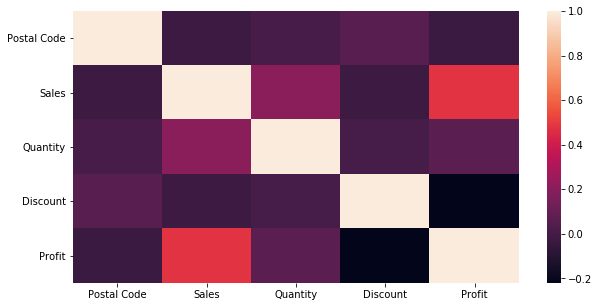

In [24]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(retail.corr(),ax=ax)

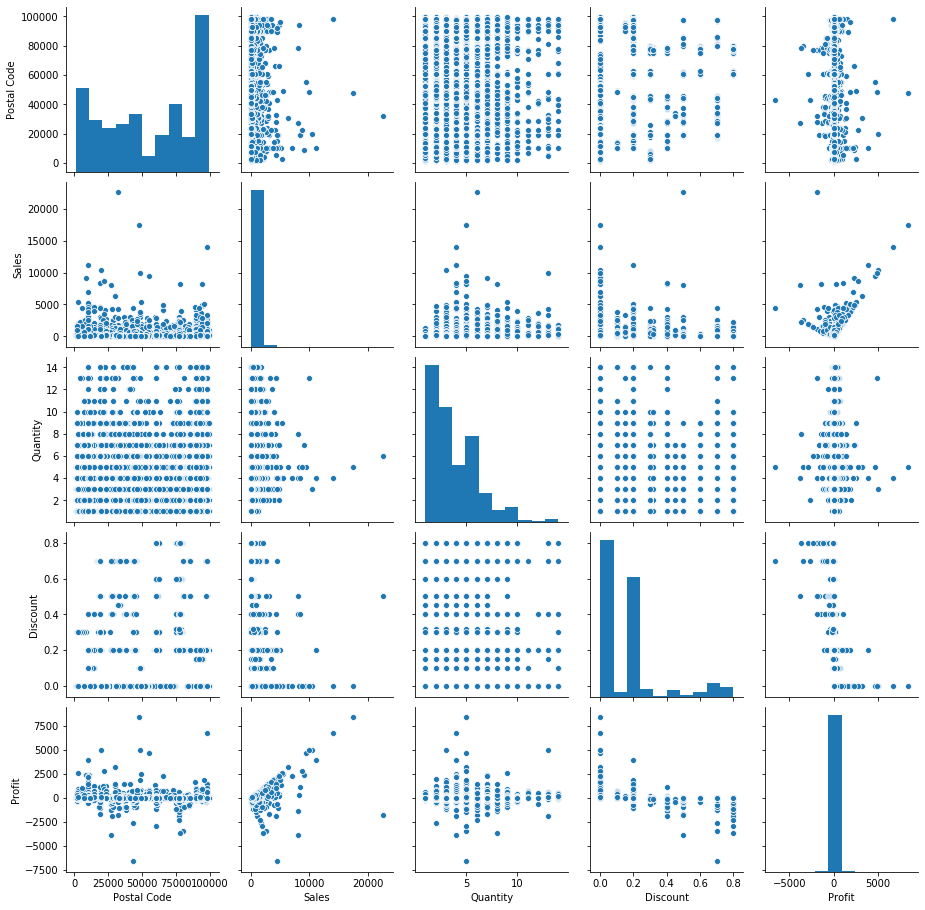

In [25]:
sns.pairplot(retail)

<h3 style="color:blue">Interpretation :</h3>

 As we can see from the values in the correlation matrix, heat map and the Pair plot that there is no such strong correlation exist between the numerical variables in the Retail Data. There is only 0.479 positive correlation between Sales and Profit which is the highest correlation present among the variables.

____________________________________________

<h2 style="color:brown"> Graphical Representation of the Retail data</h2>

______________________________________

<h3 style="color:Orange">Pair Plot</h3>

#### Numerical variables realationship based on Category

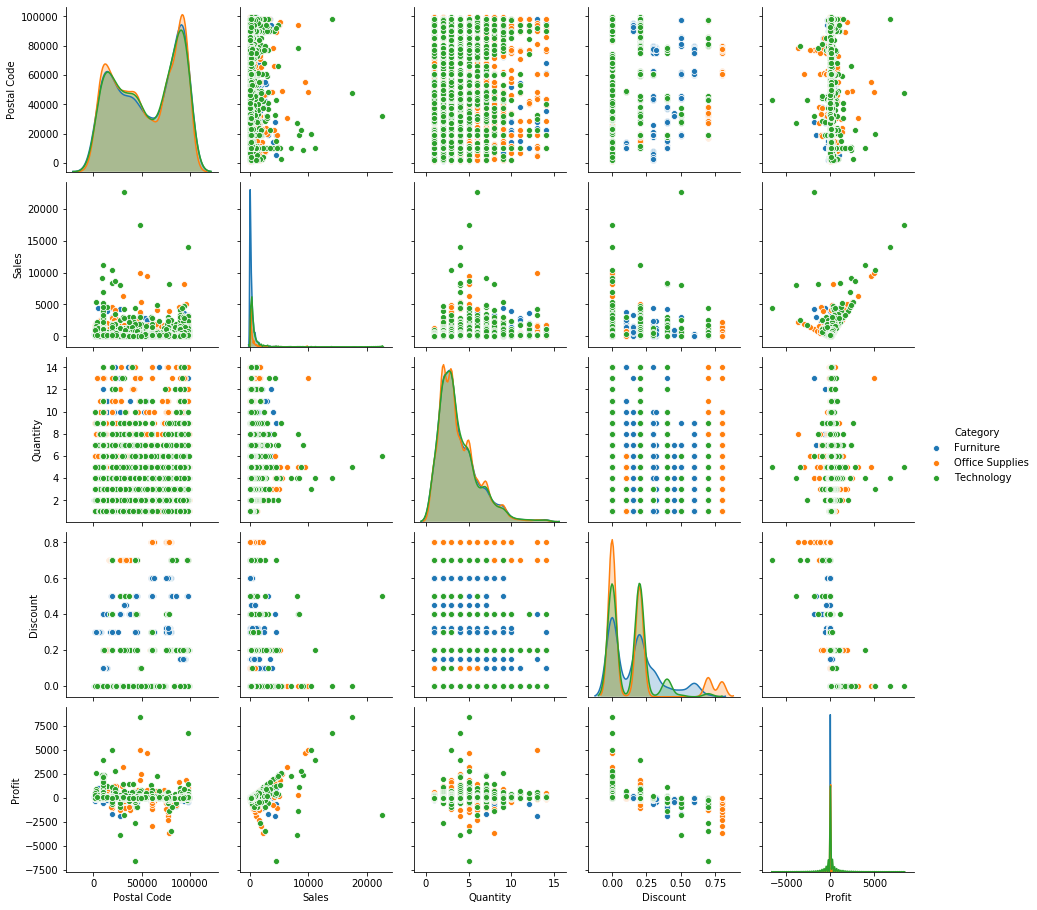

In [26]:
sns.pairplot(retail, hue='Category')
plt.show()

#### Numerical variables realationship based on Region Type

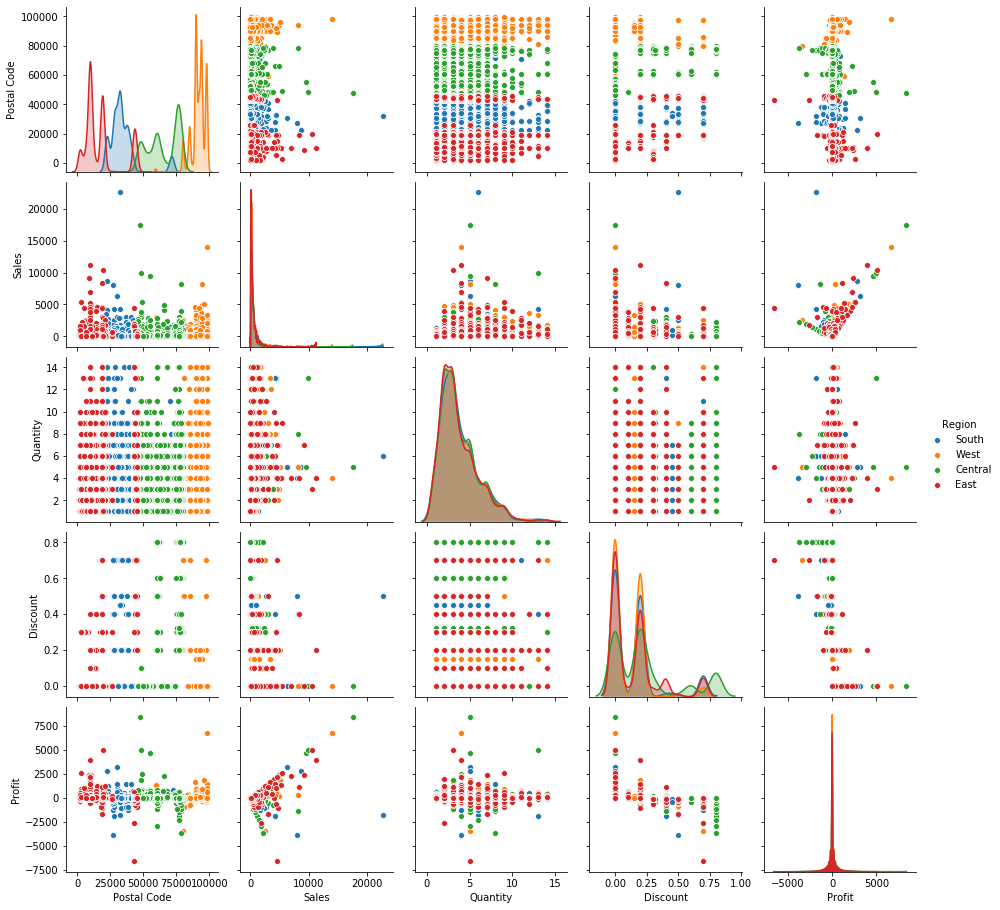

In [27]:
sns.pairplot(retail, hue='Region')
plt.show()

#### Numerical variables realationship based on Segment 

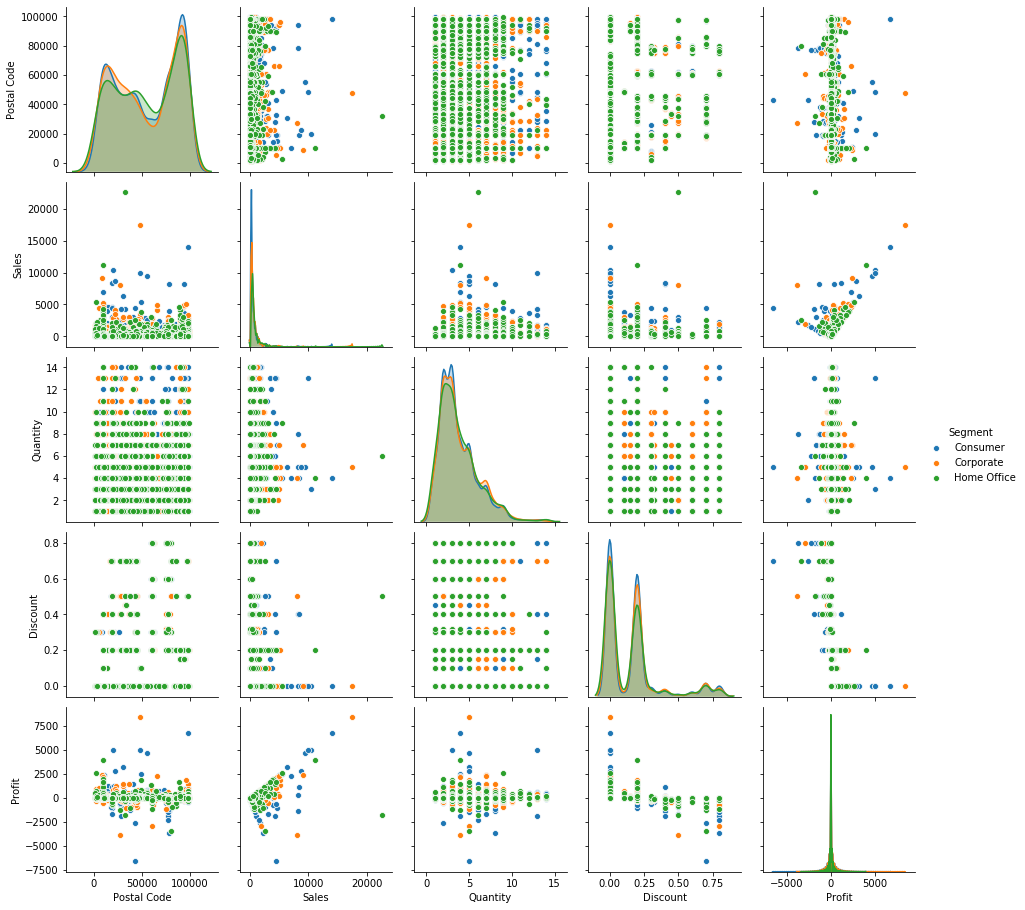

In [28]:
sns.pairplot(retail,hue='Segment')
plt.show()

#### Numerical variables realationship based on Ship Mode

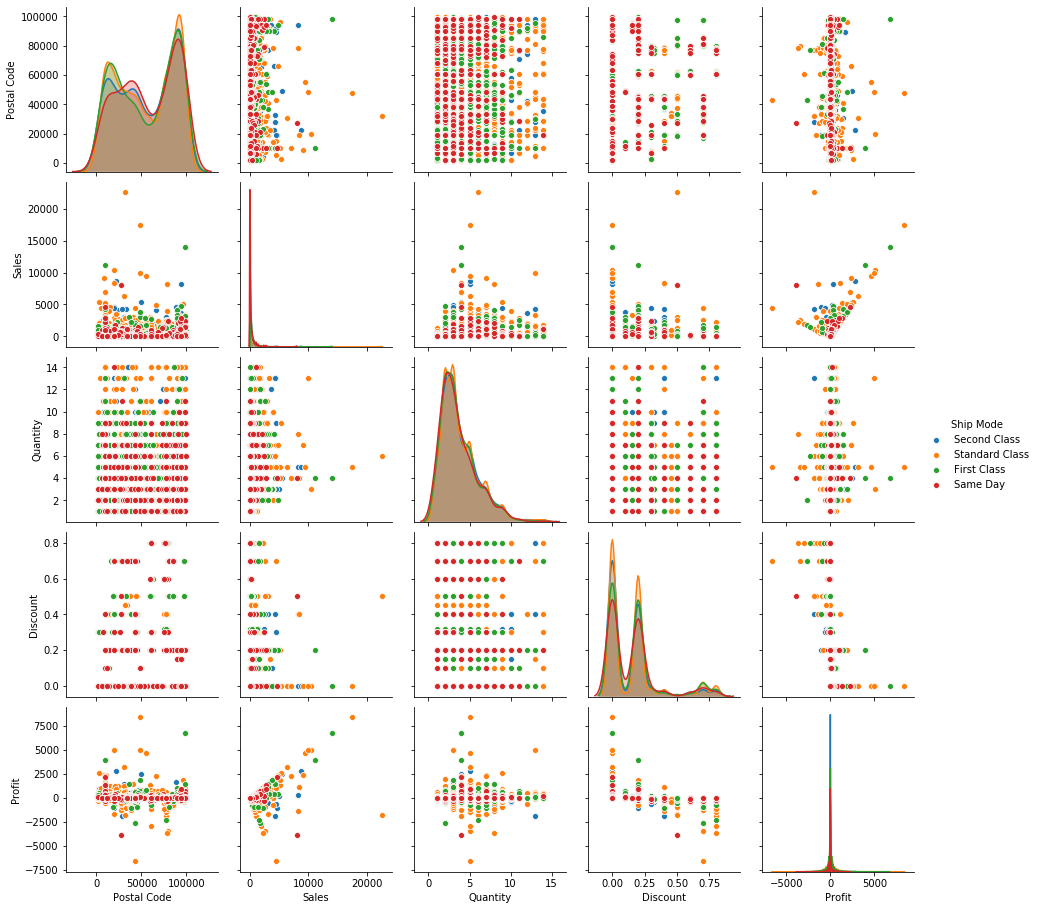

In [29]:
sns.pairplot(retail,hue='Ship Mode')
plt.show()

_________________

<h3 style="color:Orange">Distribution Plot</h3>

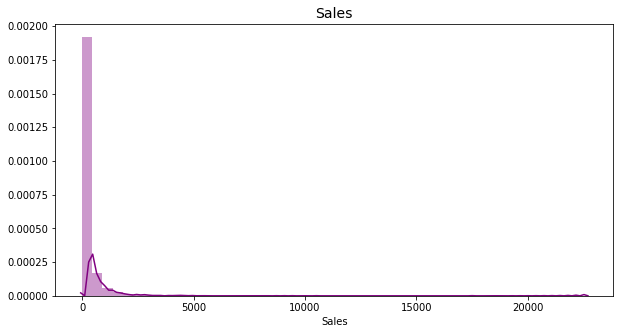

In [30]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(retail['Sales'],kde=True,ax=ax,color='purple')
plt.title('Sales',size=14)
plt.show()

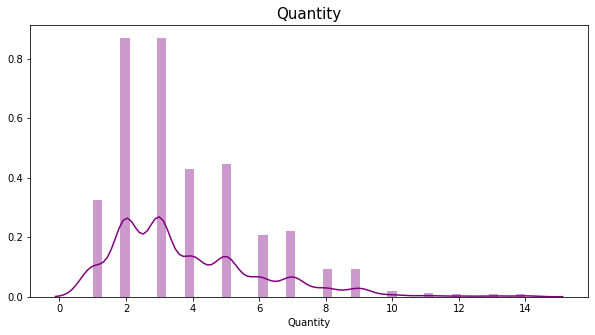

In [31]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(retail['Quantity'],kde=True,ax=ax,color='purple')
plt.title('Quantity',size=15)
plt.show()

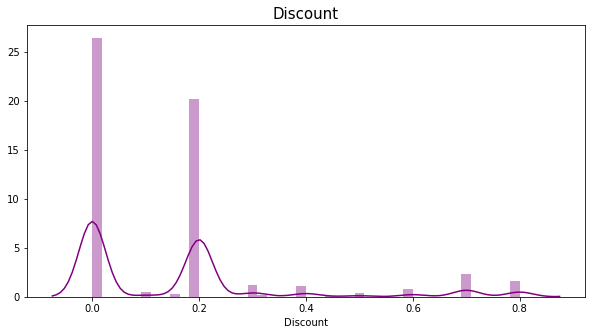

In [32]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(retail['Discount'],ax=ax,color='purple')
plt.title('Discount',size=15)
plt.show()

Text(0.5, 1.0, 'Profit')

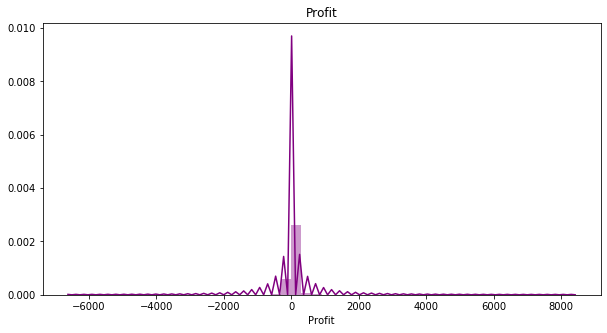

In [33]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.distplot(retail['Profit'],ax=ax,color='purple')
plt.title('Profit')

_____________________

<h3 style="color:Orange">Count Plot</h3>

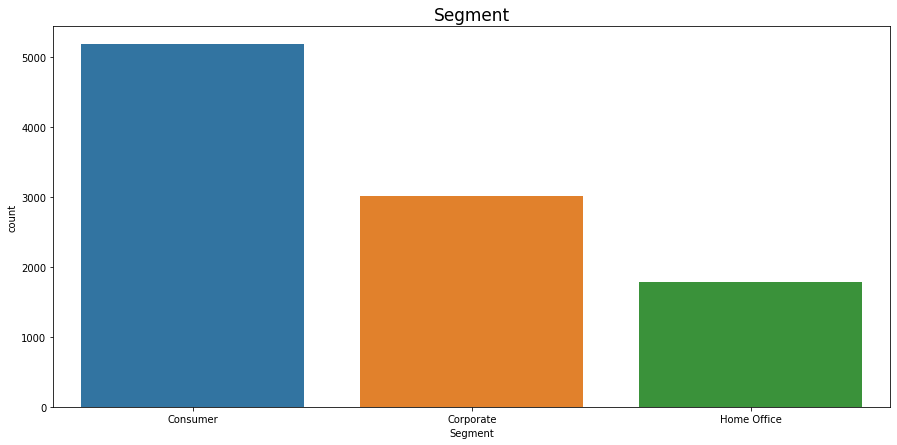

In [34]:
## COunt plot 
fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Segment',ax=ax,data=retail)
plt.title('Segment',size=17)
plt.show()

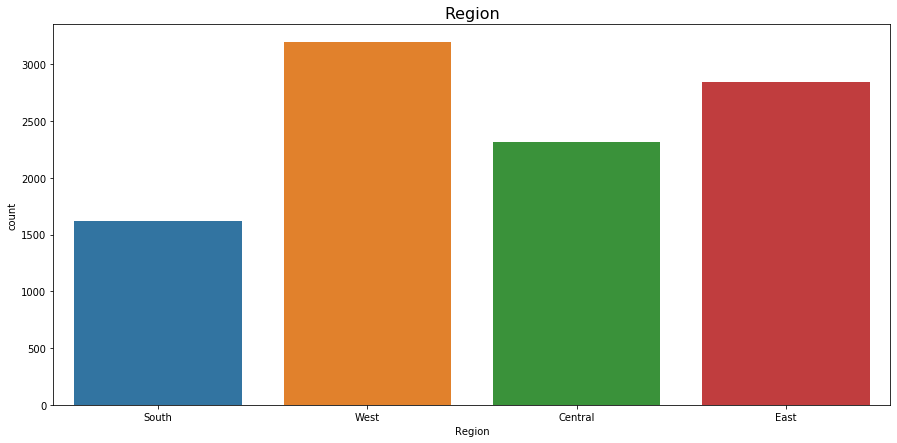

In [35]:
##
fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Region',ax=ax,data=retail)
plt.title('Region',size=16)
plt.show()

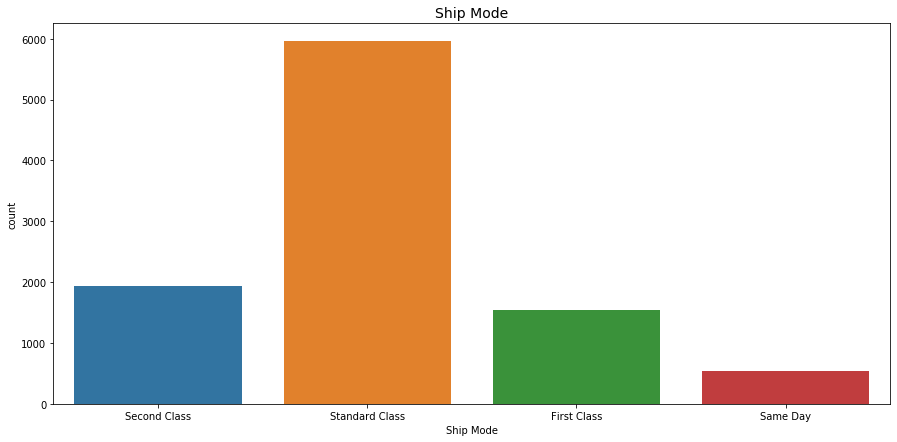

In [36]:
##
fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Ship Mode',ax=ax,data=retail)
plt.title('Ship Mode',size=14)
plt.show()

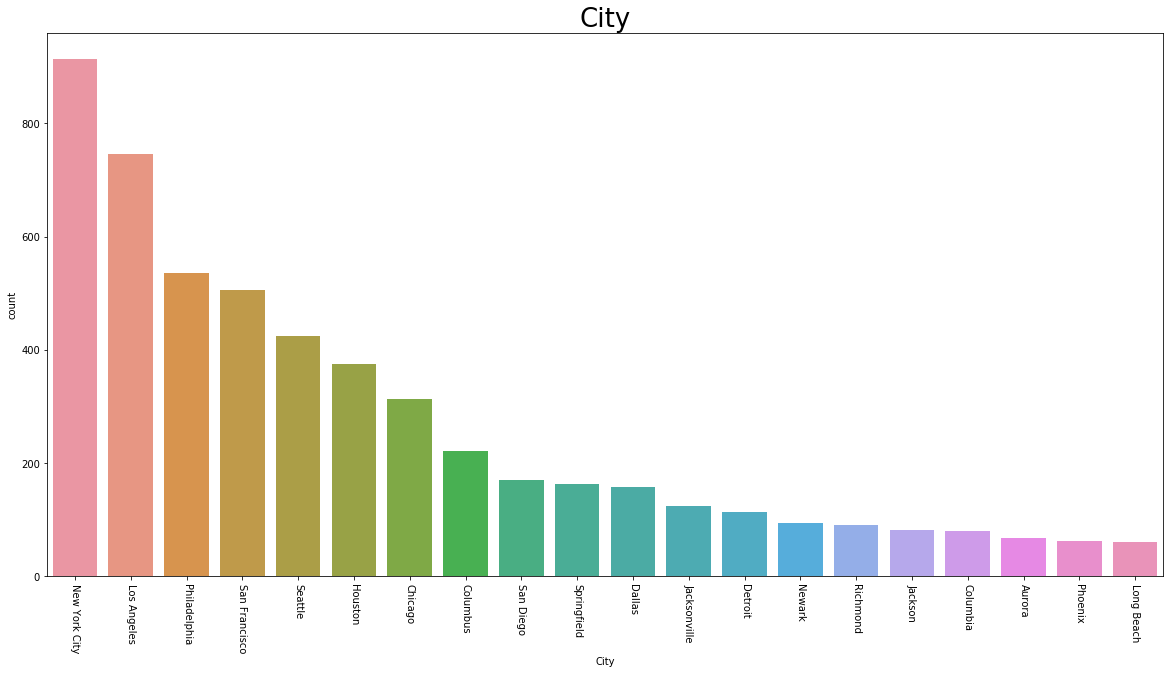

In [37]:

fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='City',ax=ax,order=retail['City'].value_counts().head(20).index,data=retail)
plt.xticks(rotation=270)
plt.title('City',size=26)
plt.show()

Text(0.5, 1.0, 'Category')

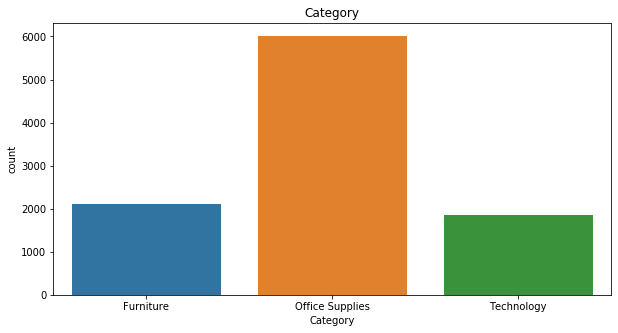

In [38]:
##
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Category',ax=ax,data=retail)
plt.title('Category')

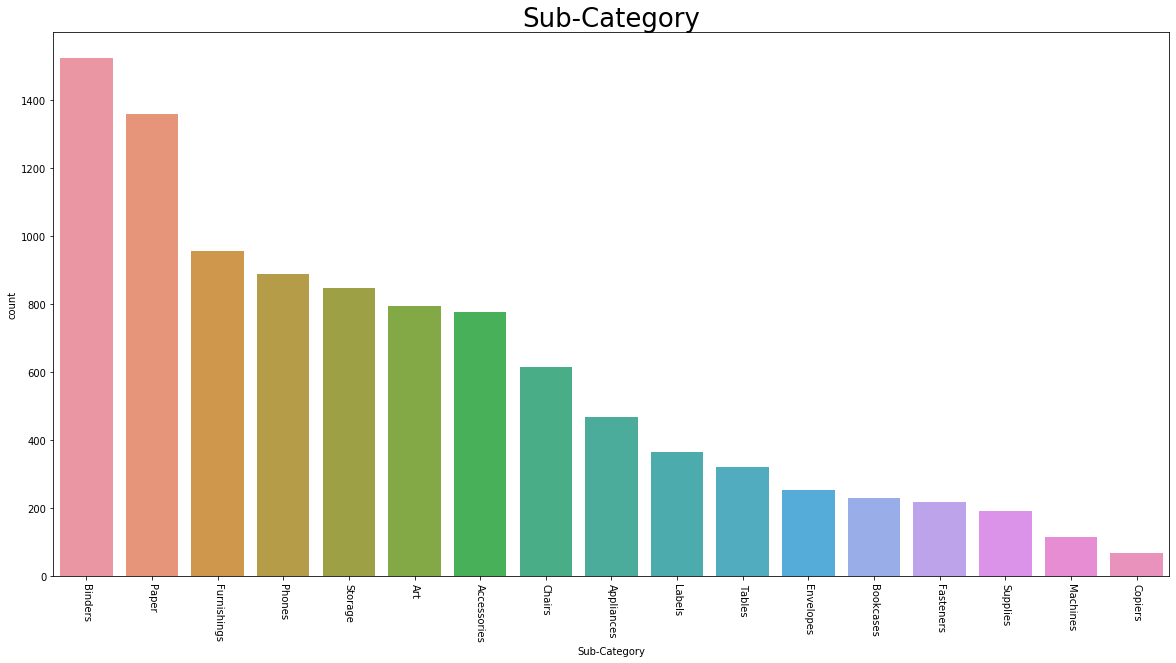

In [39]:
##
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Sub-Category',ax=ax,order=retail['Sub-Category'].value_counts().head(20).index,data=retail)
plt.xticks(rotation=270)
plt.title('Sub-Category',size=26)
plt.show()

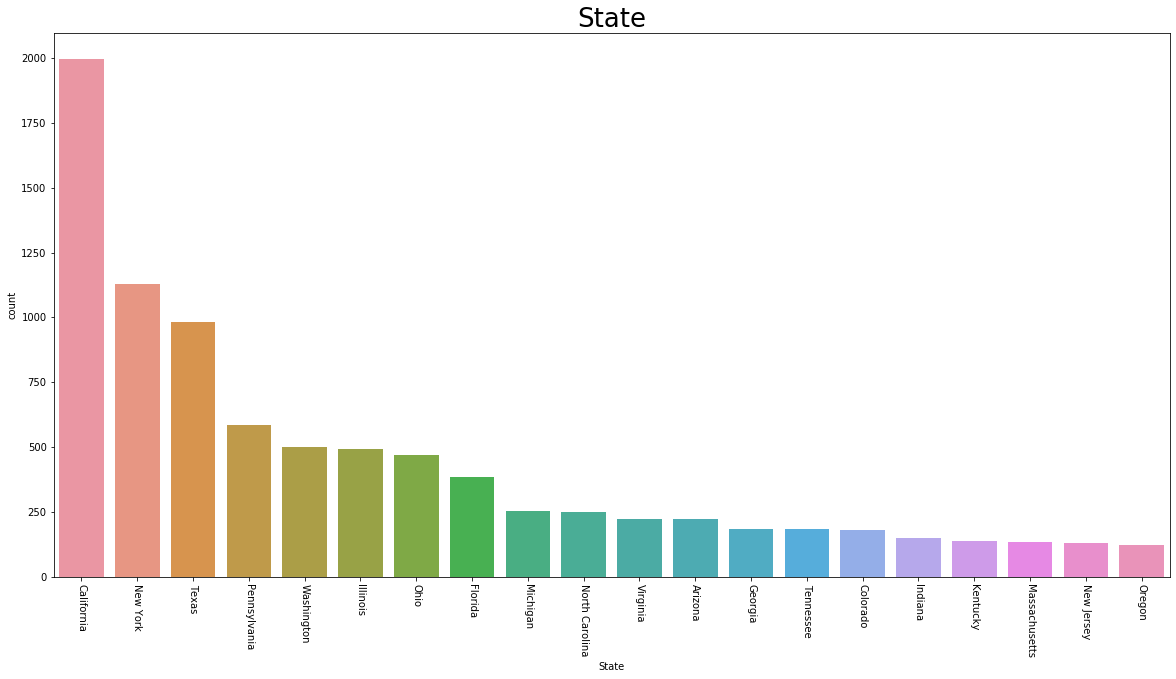

In [40]:

fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='State',ax=ax,order=retail['State'].value_counts().head(20).index,data=retail)
plt.xticks(rotation=270)
plt.title('State',size=26)
plt.show()

________________________

<h3 style="color:Orange"> Bar Plot</h3>

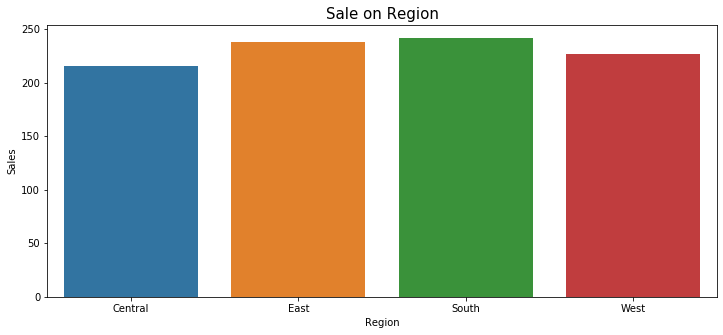

In [41]:
plt.figure(figsize=(12,5))
r = retail.groupby(['Region'])['Sales'].mean().reset_index()
sns.barplot(x = 'Region', y='Sales', data=r)
plt.title('Sale on Region',size=15)
plt.show()

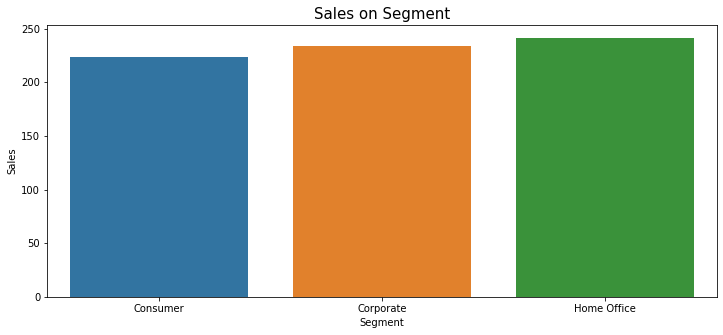

In [42]:
plt.figure(figsize=(12,5))
s = retail.groupby(['Segment'])['Sales'].mean().reset_index()
sns.barplot(x = 'Segment', y='Sales', data=s)
plt.title('Sales on Segment',size=15)
plt.show()

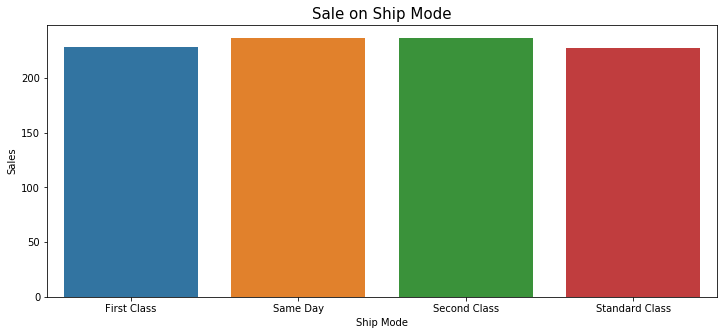

In [43]:
plt.figure(figsize=(12,5))
c = retail.groupby(['Ship Mode'])['Sales'].mean().reset_index()
sns.barplot(x = 'Ship Mode', y='Sales', data=c)
plt.title('Sale on Ship Mode',size=15)
plt.show()

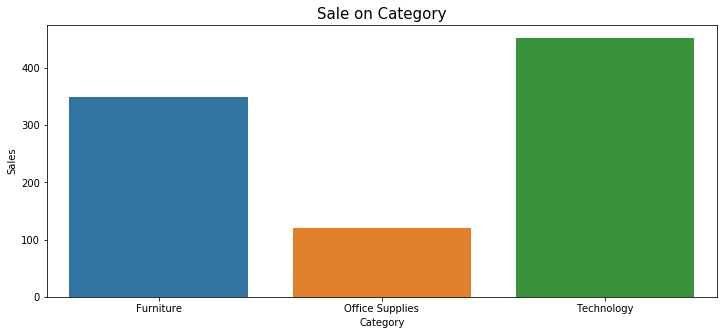

In [44]:
plt.figure(figsize=(12,5))
c = retail.groupby(['Category'])['Sales'].mean().reset_index()
sns.barplot(x = 'Category', y='Sales', data=c)
plt.title('Sale on Category',size=15)
plt.show()

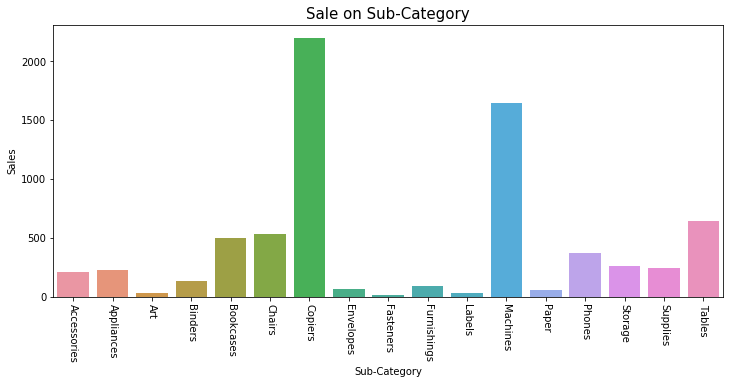

In [45]:
plt.figure(figsize=(12,5))
c = retail.groupby(['Sub-Category'])['Sales'].mean().reset_index()
sns.barplot(x = 'Sub-Category', y='Sales', data=c)
plt.title('Sale on Sub-Category',size=15)
plt.xticks(rotation=270)
plt.show()

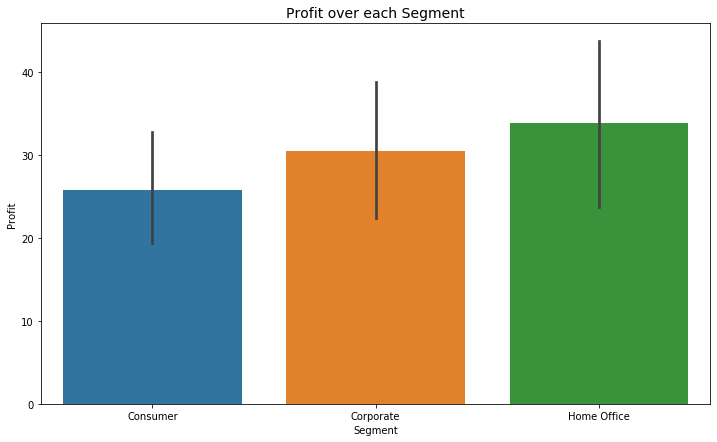

In [46]:
# Bar plot
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Segment',ax=ax,data=retail)
plt.title('Profit over each Segment',size=14)
plt.show()

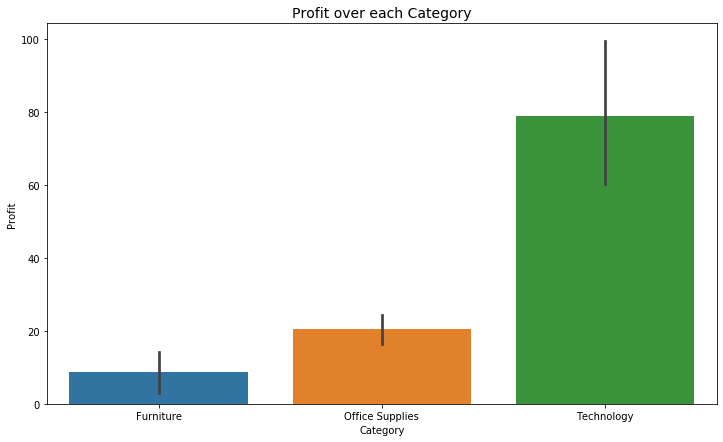

In [47]:
# Bar plot
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Category',ax=ax,data=retail)
plt.title('Profit over each Category',size=14)
plt.show()

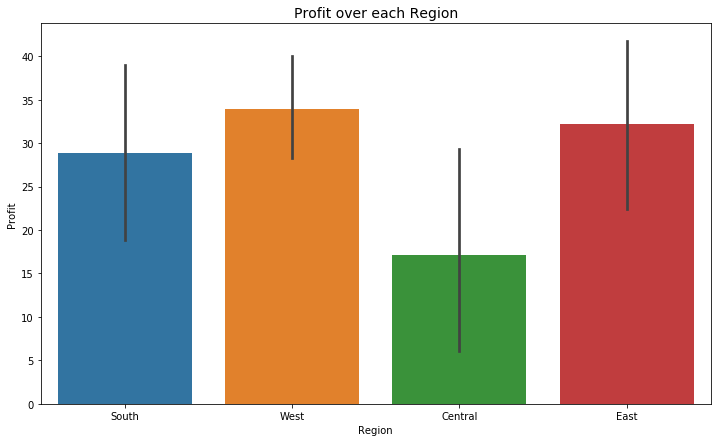

In [48]:
# Bar plot
fig_dims = (12,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Region',ax=ax,data=retail)
plt.title('Profit over each Region',size=14)
plt.show()

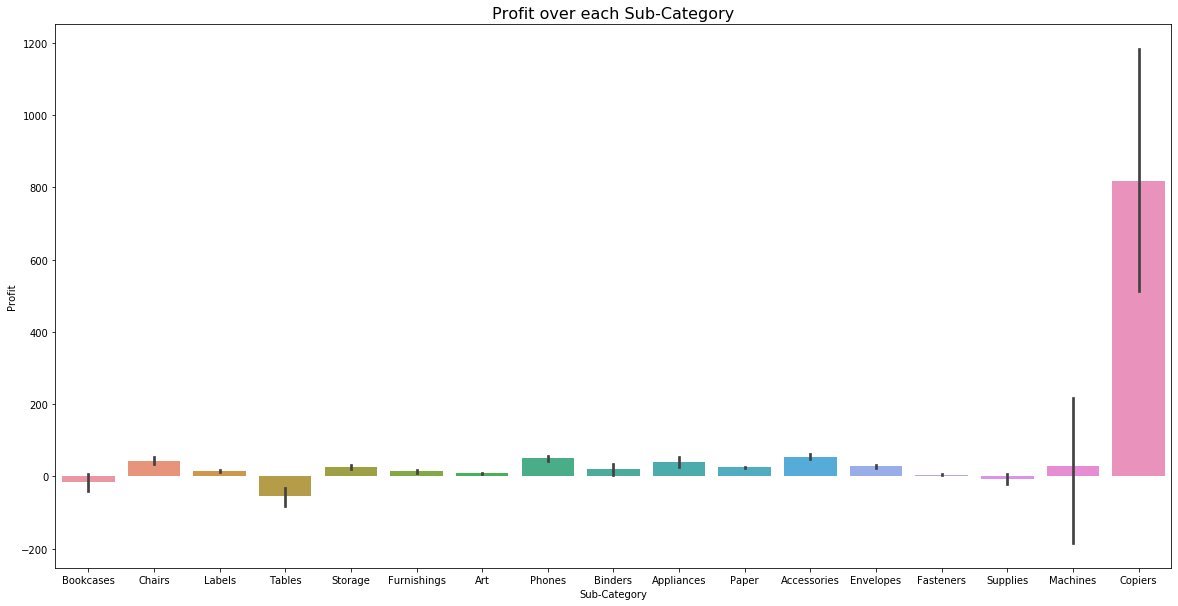

In [49]:
# Bar plot
fig_dims = (20,10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Sub-Category',ax=ax, data=retail)
plt.title('Profit over each Sub-Category',size=16)
plt.show()

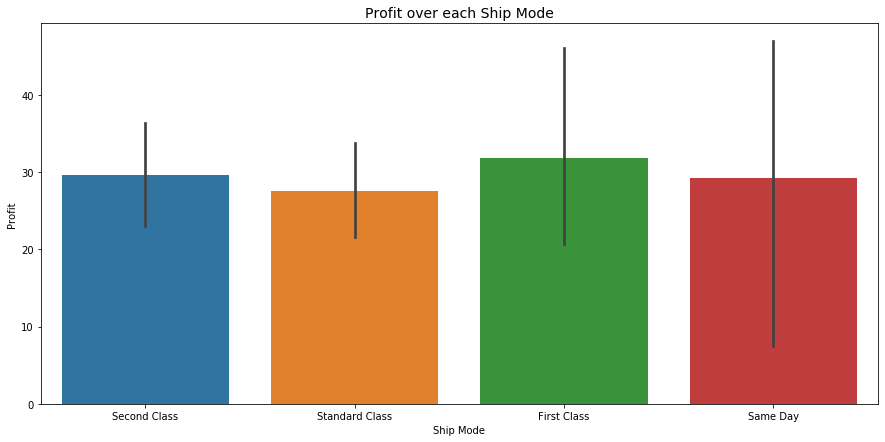

In [50]:
# Bar plot
fig_dims = (15,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Ship Mode',ax=ax, data=retail)
plt.title('Profit over each Ship Mode',size=14)
plt.show()

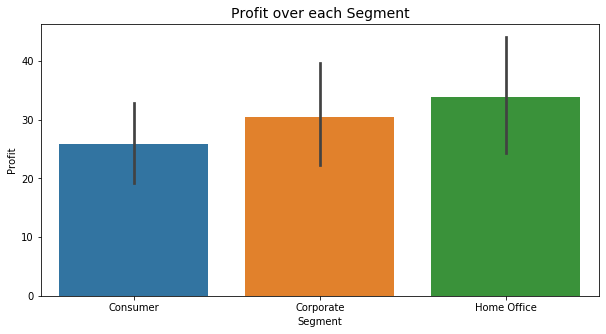

In [51]:
# Bar plot
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y='Profit',x='Segment',ax=ax, data=retail)
plt.title('Profit over each Segment',size=14)
plt.show()

______________________

<h3 style="color:Orange">Regression Plot</h3>

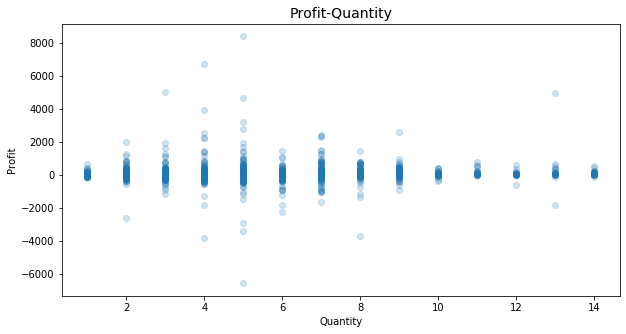

In [52]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x = "Quantity", y="Profit", data=retail, fit_reg = False, scatter_kws={"alpha": 0.2},ax=ax)
plt.title('Profit-Quantity',size=14)
plt.show()

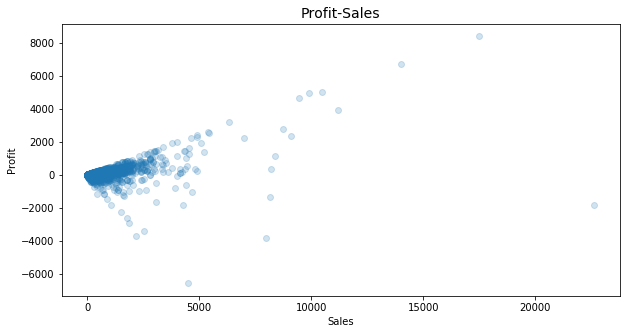

In [53]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x = "Sales", y="Profit", data=retail, fit_reg = False, scatter_kws={"alpha": 0.2},ax=ax)
plt.title('Profit-Sales',size=14)
plt.show()

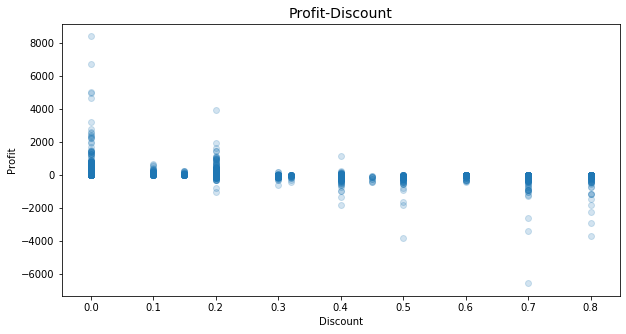

In [54]:
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x = "Discount", y="Profit", data=retail, fit_reg = False, scatter_kws={"alpha": 0.2},ax=ax)
plt.title('Profit-Discount',size=14)
plt.show()

___________________________

<h3 style="color:Orange">Joint Plot</h3>

### Profit - Sales

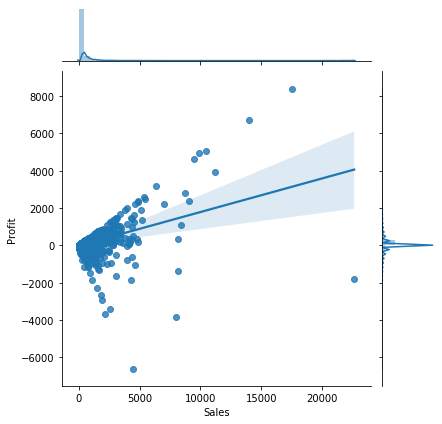

In [55]:
sns.jointplot(x='Sales',y='Profit',data=retail, kind='reg')
plt.show()

### Profit - Qunatity

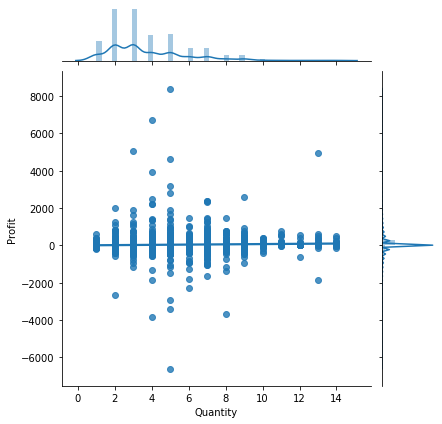

In [56]:
sns.jointplot(x='Quantity',y='Profit',data=retail, kind='reg')
plt.show()

### Profit - Discount

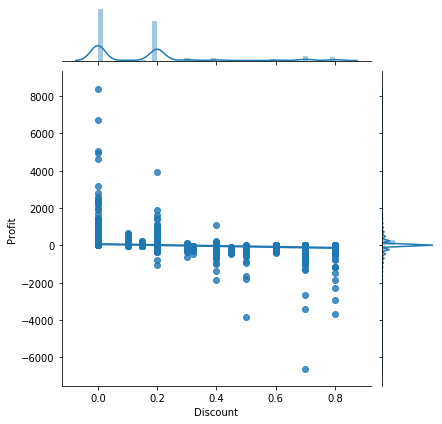

In [57]:
sns.jointplot(x='Discount',y='Profit',data=retail, kind='reg')
plt.show()

__________________

<h2 style="color:orange"> Line Plot</h2>

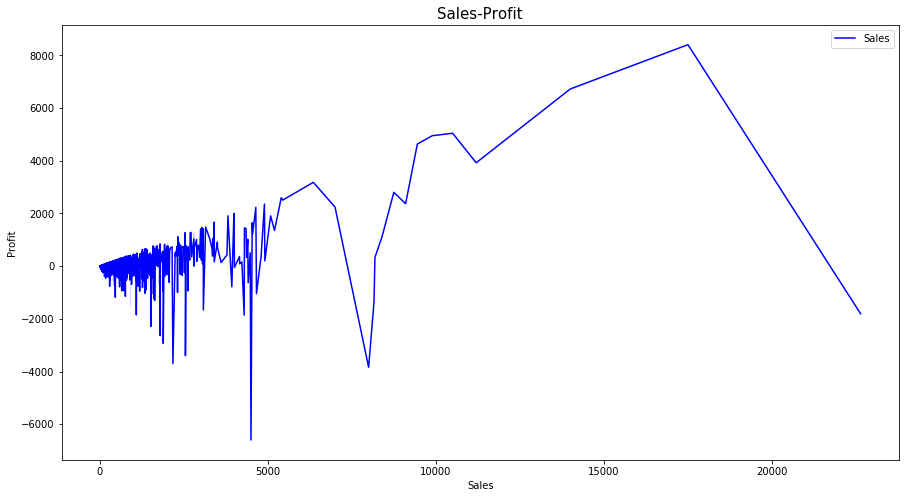

In [58]:
plt.figure(figsize = (15,8))
sns.lineplot('Sales', 'Profit', data = retail, color = 'b', label= 'Sales')
plt.title('Sales-Profit',size=15)
plt.show()

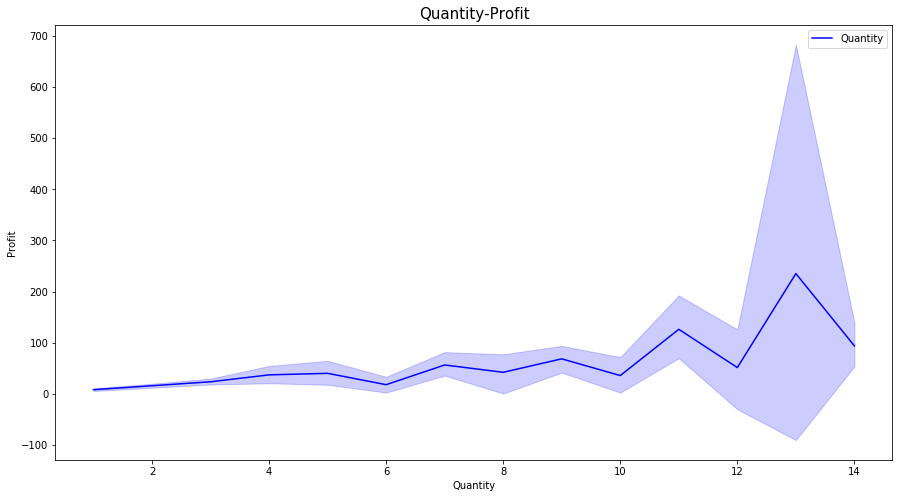

In [59]:
plt.figure(figsize = (15,8))
sns.lineplot('Quantity', 'Profit', data = retail, color = 'b', label= 'Quantity')
plt.title('Quantity-Profit',size=15)
plt.show()

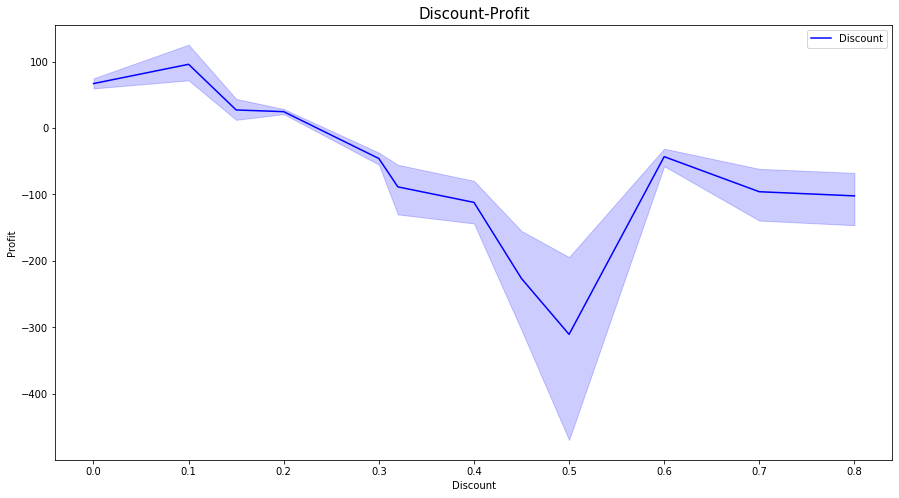

In [60]:
plt.figure(figsize = (15,8))
sns.lineplot('Discount', 'Profit', data = retail, color = 'b', label= 'Discount')
plt.title('Discount-Profit',size=15)
plt.show()

___________________

<h2 style="color: Blue"> Conclusion and Results</h2>

_____________

1.  We can see from the countplot of Segment, Consumer type has the highest value and Home Office has the lowest value. But when we see the profit in each segment, Home Office has the maximum profit and Consumer has the lowest Profit, whereas sales of each Segment is almost same. It is important for the Retailer to fill in the gap between the two segments. 


2.  From the Countplot of Category we can see that Office Supplies has the highest value whereas Furniture and Technology has almost same values. But when we consider barplot of Profit and Sales on each Category, we can see tht Technology category provides the maximum sales and Profit to the Retailer, whereas Home Supplies provides the lowest sales and second lowest profits to the Retailer. Retailer should try to reduce the products related to Home Supplies or try to find right marketing strategy to increase Home Supplies sales.


3.  We can see from the Cout plot of Region, West has the highest value followed by East, Central and South respectively. And when we look at the profit on from each Region, West provides the maximum profit to the Retailer. Sales on each reagion is almost same but the profit incurred from each region varries a lot. Retailer should look into the increasing the Profit in Central Region and also look into the reason why Profit is not more in other regions after having equal sales.


4. When we look at the Count plot of Sub-Category, we can see the maximum values are of Papers followed by Binders and the Copier and Machines as the lowest values. But when we look at the Pofit and the sales barplot on each Sub Category, we ca see that Machine and Copier provides the maximum Sales and Profit to the Retailer whereas Paper and Binder doesnot provide any significant profit or sales to the retailer. Retailer should try to reduce the Paper and Binder products and inccrease the Copier and Machine Products. Retailer should look at the Sub- Categories such as Table which inncurr loss to the retailer but has the reasonable sales. He should focus on these categories and dig more to know why such profits are less in these categories.

_____________________